## Importar librerías

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import math
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


## Importar datos

In [49]:
df = pd.read_csv('Datasets/datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)

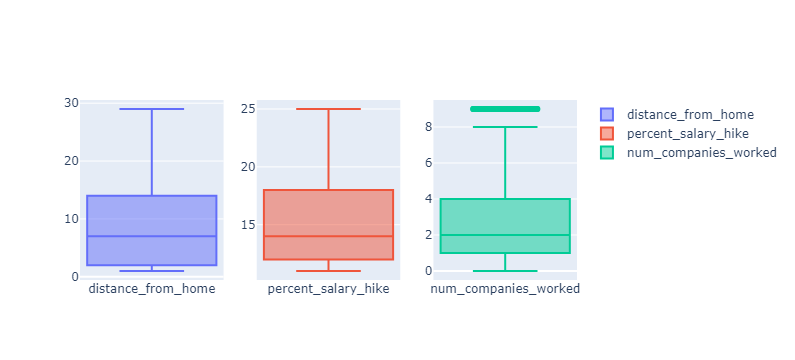

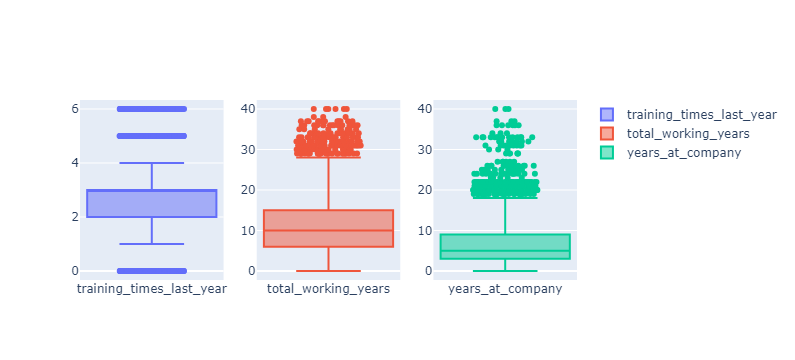

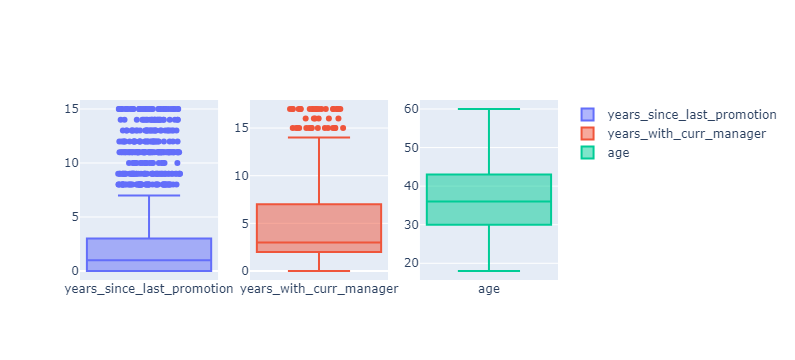

In [83]:

numerical_feat = ['distance_from_home', 'percent_salary_hike', 'num_companies_worked', 
                  'training_times_last_year', 'total_working_years', 'years_at_company', 
                  'years_since_last_promotion', 'years_with_curr_manager', 'age']  #Variables numéricas
ndata=numerical_feat

data = df[numerical_feat].copy()
_ = ndata.copy()

# Boxplots de variables numéricas
for z in range(3):
    cols = 3
    rows = 1
    fig = make_subplots(cols=cols, rows=rows)

    for j,k in zip(range(1, cols+1), _[0:cols]):

        _.remove(k)

        fig.add_trace(go.Box(y=data[k],
                            jitter=0.5,
                             name=k, width=800), row=1, col=j)
    fig.show()

In [50]:
#Análisis descriptivo de las variables numéricas 
data.describe()

,distance_from_home,percent_salary_hike,num_companies_worked,training_times_last_year,total_working_years,years_at_company,years_since_last_promotion,years_with_curr_manager,age
count,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000
mean,9.190184,15.207453,2.690298,2.798228,11.279936,7.003636,2.188366,4.122927,36.920473
std,8.102578,3.659222,2.492848,1.288483,7.782222,6.123315,3.221407,3.568056,9.139377
min,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,2.000000,12.000000,1.000000,2.000000,6.000000,3.000000,0.000000,2.000000,30.000000
50%,7.000000,14.000000,2.000000,3.000000,10.000000,5.000000,1.000000,3.000000,36.000000
75%,14.000000,18.000000,4.000000,3.000000,15.000000,9.000000,3.000000,7.000000,43.000000
max,29.000000,25.000000,9.000000,6.000000,40.000000,40.000000,15.000000,17.000000,60.000000


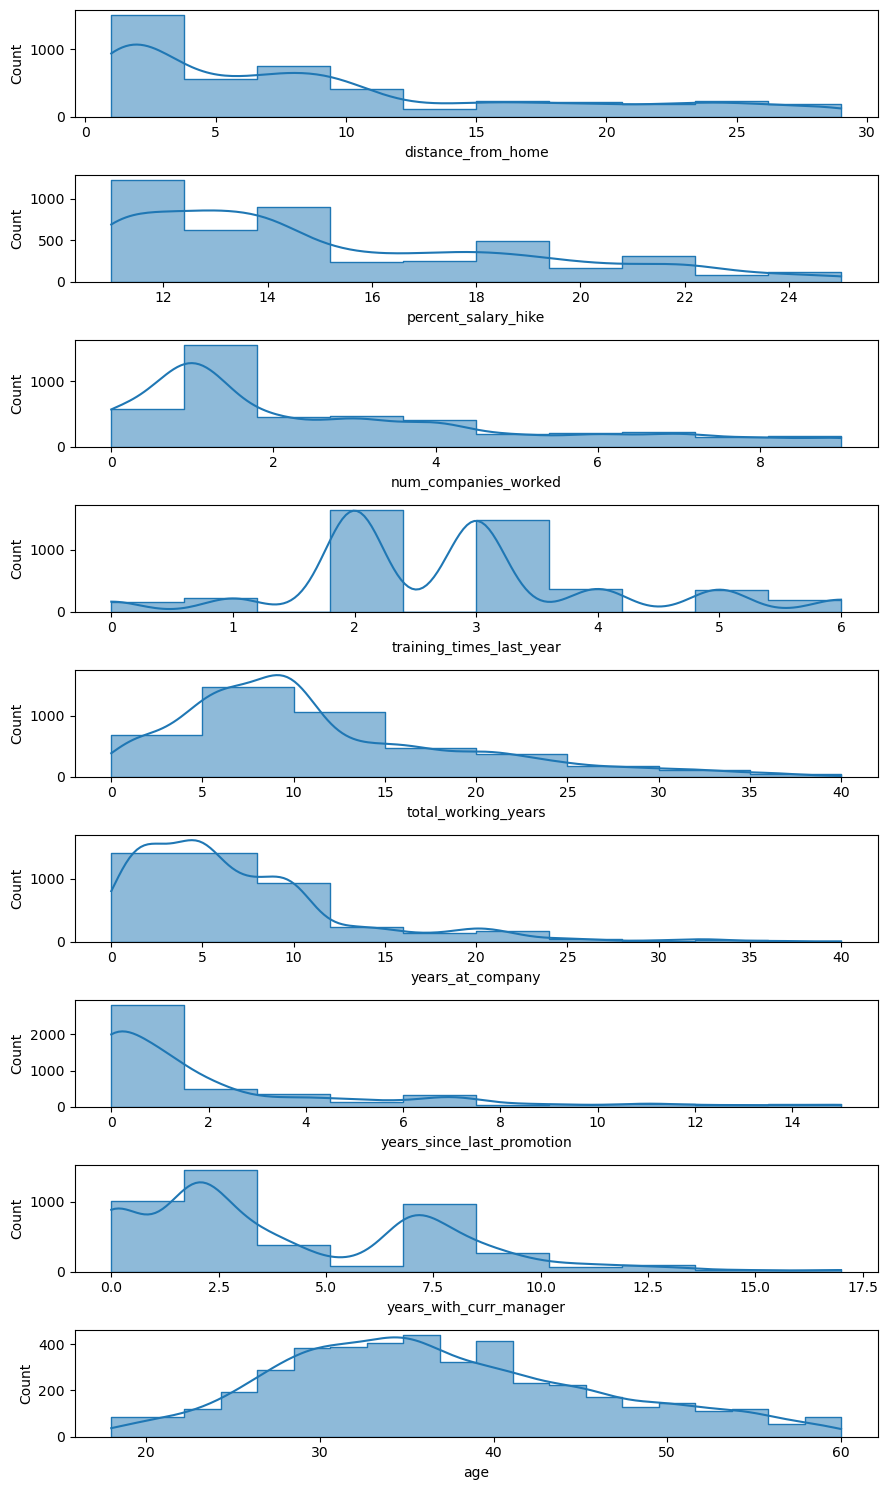

In [82]:
# time_feat = df.loc[:, df.columns.str.contains('Years')].columns.values.tolist() + ['Age']  # Variables de tiempo

# Histograma para las variables numericas 

fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(9,15))

bins = [10] + [10]*2 + [10] + [8] + [10]*3 + [20] + [25]

for i,k,b in zip(axes,ndata, bins):
    sns.histplot(ax=i, data=df, x=k, bins=b, kde=True, element="step", legend=None)
    
plt.tight_layout()
plt.show()

El promedio de la edad es de 39 con una desviación de 9, se puede ver que el histograma que representa muy bien estos datos, donde su pico se encuentra alrededor de 36 con una distribución casi normal, por otra parte, el el boxplot muestra una caja compacta y simétrica. 

El promedio de los años que los trabajadores que llevan en la compañía es de siete años, sin embargo, 
el 75% de las personas llevan trabajando nueve años o menos, esto es debido a hay personas que han
trabajado hasta 40 años, se identifica muchos datos atípicos en el bloxplot, lo que hace que aumente el promedio a pesar de personas que llevan tantos años.

En la variable distancia de casa se puede observar en el histograma que los kilómetros de distancia de las personas
al trabajo son muy variados que se concentran entre 2 y 14 km, con algunos algunas personas que tienen una distancia 
de hasta 29 kilómetros de su casa al lugar del trabajo

En los entrenamientos del último año hay mucha variación, no hay un patrón fijo o una tendencia,
con una mediana igual al 75% de las personas que han realizado 3 entrenamientos el último año,
no se puede concluir correctamente sobre esta variable.